In [60]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
columnas_corr = ['ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews']

plt.figure(figsize=(10,10))
sns.heatmap(beer[columnas_corr].corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);
plt.show()

In [ ]:
x = beer["Malty"]
y = beer["Body"]

plt.scatter(x, y)

plt.xlabel('Malty')
plt.ylabel('Body')

plt.title('Diagrama de Dispersión')

plt.show()

In [ ]:
# Define los pasos para el pipeline para cada modelo
knn_pipeline = Pipeline([
    ('modelo', KNeighborsClassifier())
])

arbol_pipeline = Pipeline([
    ('modelo', DecisionTreeClassifier())
])

forest_pipeline = Pipeline([
    ('modelo', RandomForestClassifier())
])

# Entrena y evalúa cada modelo en el pipeline
for nombre, pipeline in [("KNN", knn_pipeline), ("Árbol de Decisión", arbol_pipeline), ("Random Forest", forest_pipeline)]:
    pipeline.fit(X_train, Y_train)
    prediccion = pipeline.predict(X_test)
    accuracy = accuracy_score(Y_test, prediccion)
    print(f"Precisión del modelo de {nombre}: {accuracy}")

In [ ]:
# Aquellos que superan el umbral de 0.50

corr_matrix = beer[columnas_shapiro].corr()
threshold = 0.50
high_corr_matrix = corr_matrix[abs(corr_matrix) > threshold]

plt.figure(figsize=(10, 8))
sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de Calor de Correlaciones (Umbral > 0.50)')
plt.show()

In [61]:
beer_ML = pd.read_csv("./cerveza.csv")
beer_ML = beer_ML.copy()
beer_ML.head()

,nombre,estilo,alcohol_%,min_IBU,max_IBU,astringencia,cuerpo,alcohol_gr/lt,amargor,dulzor,...,salado,frutado,lupulo,especias,malteado,opinion_aroma,opinion_apariencia,opinion_paladar,opinion_sabor,opinion_general
0,Amber,Altbier,5.3,25,50,13,32,9,47,74,...,0,33,57,8,111,3.50,3.64,3.56,3.64,3.85
1,Double Bag,Altbier,7.2,25,50,12,57,18,33,55,...,0,24,35,12,84,3.80,3.85,3.90,4.02,4.03
2,Long Trail Ale,Altbier,5.0,25,50,14,37,6,42,43,...,0,10,54,4,62,3.41,3.67,3.60,3.63,3.83
3,Doppelsticke,Altbier,8.5,25,50,13,55,31,47,101,...,1,49,40,16,119,4.15,4.03,4.15,4.21,4.01
4,Sleigh'r Dark Doüble Alt Ale,Altbier,7.2,25,50,25,51,26,44,45,...,1,11,51,20,95,3.62,3.97,3.73,3.77,3.82


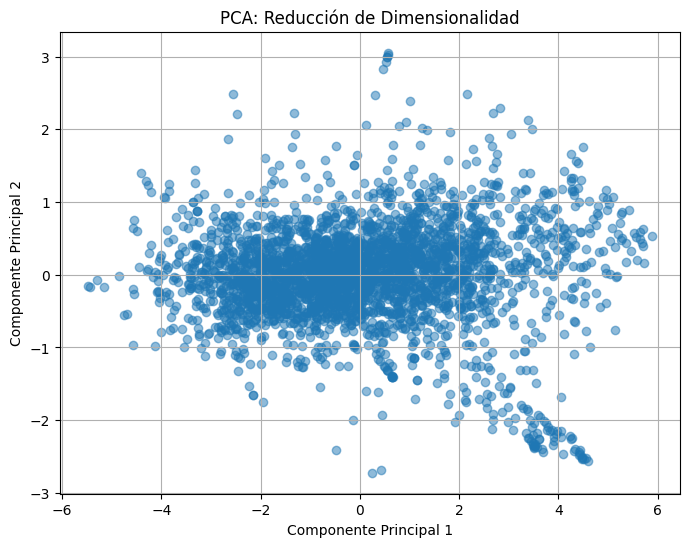

Varianza explicada por Componente 1: 0.80
Varianza explicada por Componente 2: 0.09


In [42]:
# Estandariza los datos (media cero, varianza uno)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataframe1)

# Aplica PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
data_pca = pca.fit_transform(data_scaled)

# Crea un DataFrame para visualizar los resultados
df_pca = pd.DataFrame(data_pca, columns=['Componente 1', 'Componente 2'])

# Grafica los datos en el espacio de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['Componente 1'], df_pca['Componente 2'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: Reducción de Dimensionalidad')
plt.grid(True)
plt.show()

# Imprime la varianza explicada por cada componente principal
print(f"Varianza explicada por Componente 1: {pca.explained_variance_ratio_[0]:.2f}")
print(f"Varianza explicada por Componente 2: {pca.explained_variance_ratio_[1]:.2f}")

In [ ]:
Grid Search:
param_grid = {
    'n_estimators': [5,10,100,200],  
    'max_depth': [5,25,50,100],     
    'min_samples_split': [5,10,30,50]  
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=40),
    param_grid=param_grid,
    scoring='balanced_accuracy',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_

print("Mejores parámetros encontrados:", grid_search.best_params_)
